In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage

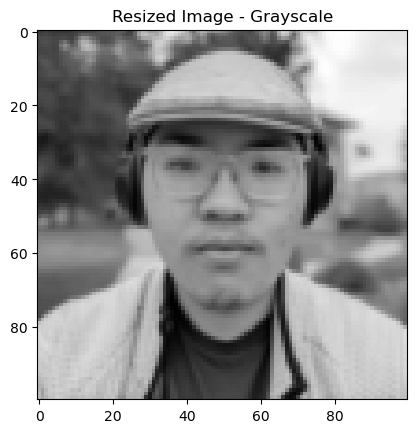

In [2]:
# load image
image = skimage.io.imread("assignment1_photo.jpg")
# conver gray scale
image_gray = skimage.color.rgb2gray(image)
# down sample
image_small = skimage.transform.resize(image_gray, (100, 100))

plt.imshow(image_small, cmap=plt.cm.gray)
plt.title("Resized Image - Grayscale")
plt.show()

In [3]:
# define a convolution function
# source: https://stackoverflow.com/questions/2448015/2d-convolution-using-python-and-numpy
def convolution3by3(image, filter):
    y, x = image.shape
    y = y - 3 + 1
    x = x - 3 + 1
    new_image = np.zeros((y, x))
    for i in range(y):
        for j in range(x):
            new_image[i][j] = np.sum(image[i:i+3, j:j+3]*filter)

    return new_image

In [4]:
# define filters
# sobel
f1 = np.array([[1, 2, 1, 0, 0, 0, -1, -2, -1]]).reshape((3,3))
# sharpen
f2 = (np.array([0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]) - (1/9) * np.repeat(1.0, 9)).reshape(3, 3)
# blur
f3 = (1/16) * np.array([1.0, 2.0, 1.0, 2.0, 4.0, 2.0, 1.0, 2.0, 1.0]).reshape(3,3)

In [5]:
# applied filter
image_f1 = convolution3by3(image_small, f1)
image_f2 = convolution3by3(image_small, f2)
image_f3 = convolution3by3(image_small, f3)

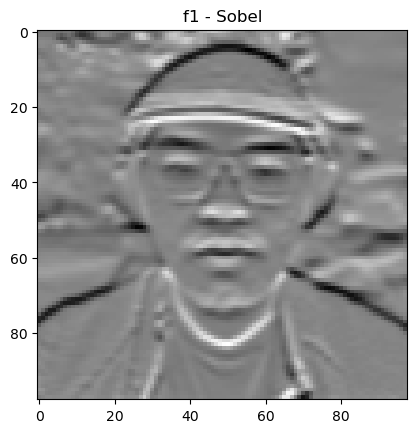

In [6]:
plt.imshow(image_f1, cmap=plt.cm.gray)
plt.title("f1 - Sobel")
plt.show()

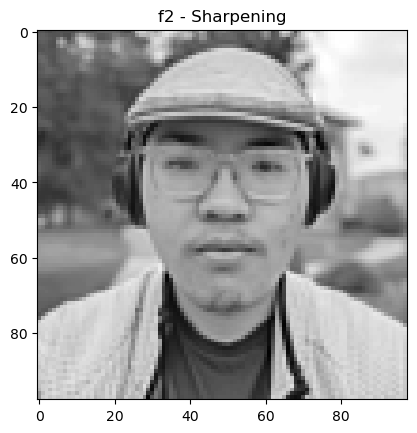

In [7]:
plt.imshow(image_f2, cmap=plt.cm.gray)
plt.title("f2 - Sharpening")
plt.show()

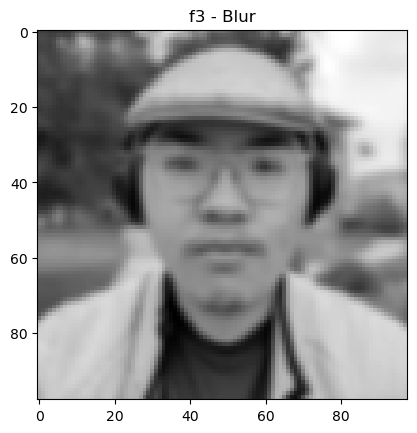

In [8]:
plt.imshow(image_f3, cmap=plt.cm.gray)
plt.title("f3 - Blur")
plt.show()